In [6]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [7]:
from typing import Tuple

import numpy as np
import pandas as pd

from statsmodels.graphics import tsaplots
from load_dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

In [25]:
from statsmodels.stats import diagnostic


In [8]:
dataset = Dataset('../data/dataset/')

# Задание 1 
(1 балл) Для чего нужно понятие стационарности в анализе временных рядов?
Перечислите все случаи и распишите свой ответ.

Стационарный временной ряд - это ряд с константными матожиданием и диспресией. Он очищен от сезонности, гетероскедастичности и тренда, соответственно его проще моделировать, отталикваясь от констант. 

# Задание 2
(1 балла) Рассмотрите картинку data/images/ts_types.png.

a. Назовите ряды с гетероскедастичностью

Ответ: b, d,e, g i

b. Какие ряды имеют сезонность?

g, h ,i

с. Какие ряды имеют цикличность?
d

d. Какие ряды можно приблизить моделью интегрированного ряда?

a, c, e, f, i

e. Какие ряды можно считать стационарными?

b

# Задание 3
(2 балла) Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/
dow_jones.csv). Предположим, вы можете сделать только одно
преобразование ряда, чтобы сделать его стационарным. Какое
преобразование вы выберете и почему? Сделайте это преобразование,
проверьте, получили ли вы белый шум.


In [17]:
dj = dataset['dow_jones_0.csv']

<AxesSubplot:xlabel='2018-11-30'>

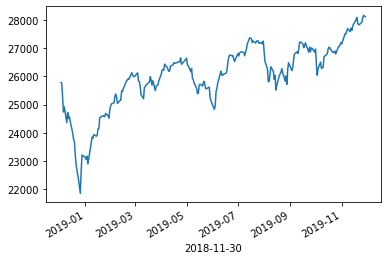

In [38]:
dj.plot()

Исходя из графика наилучшим способом приведения к стационарности будет дифференцирование (т.к явная сезонность и тренд отсутствуют)

In [23]:
dj_diff = dj.diff()

<AxesSubplot:xlabel='2018-11-30'>

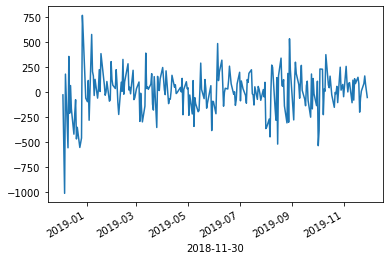

In [39]:
dj_diff.plot()

In [33]:
_, p_value = diagnostic.acorr_ljungbox(dj_diff.dropna())

In [35]:
max(p_value), min(p_value)

(0.7999207034483343, 0.19286493164388577)

P-value критерия Ланга-Бокса превышает заданный порог 5%, а значит мы не можем отвергнуть нулевую гипотезу, что ряд случаен

In [37]:
p_value = adfuller(dj_diff.dropna())[1]
p_value

7.270680965724108e-27

P-value критерия Дики-Фуллера ниже уровня значимости в 5%, значит мы может отвергнуть нулевую гипотезу, что ряд не стационарен.

Из статистических тестов выше можем сделать вывод, что получившийся дифференцированием ряд стационарен

# Задание 4
(2 балла) Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него
график автокорреляций. Обьясните закономерности, которые вы видите.

In [41]:
stl_example = dataset['stl_example.csv']

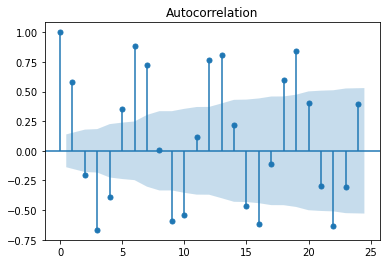

In [43]:
tsaplots.plot_acf(stl_example);

<AxesSubplot:>

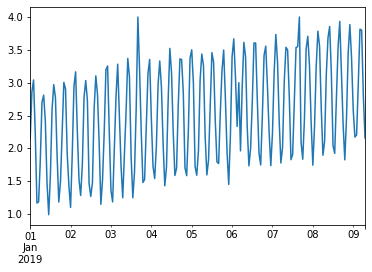

In [44]:
stl_example.plot()

Из графика автокорелляции мы явно видим сезонность с периодом 6, т.к каждые 6 точек корреляция выходит на пик. Помимо этого мы видим выбросы на 7й, 13й и 19 точках

# Задание 5
(4 балла) На семинаре, посвященном stl разложению мы находили период
сезонности сезонных временных рядов при помощи графика автокорреляций.
Однако, если бы мы захотели построить автоматическую систему определения
периода, мы бы уже не могли “вручную” анализировать каждый график. Таким
образом вам необходимо написать функцию get_seasonal_period(), которая бы
автоматически определяла период сезонных временных рядов, использую
автокорреляционную функцию.

In [9]:
ts = dataset['stl_example.csv']

In [46]:
def get_period_from_autocorr(ts, threshold=.8):
    """
    Для извлечения периода из автокорреляции берутся значения авторкорреляции
    выше порога(по умолчанию 0.8). По оставшимся сэмплам считается разница между их 
    порядковыми номерами во временом ряде. От них берется медиана, чтобы устойчивым
    к выбросам способам определить период
    """
    autocorr_sr = pd.Series([ts.autocorr(i) for i in range(25)], index=range(25))
    period = (autocorr_sr[autocorr_sr > threshold].index.to_series()).diff().median()
    return period

In [47]:
ts_per = get_period_from_autocorr(ts)

In [48]:
print(ts_per)

6.0
